<a href="https://colab.research.google.com/github/Ahmad-Nedal/TH2/blob/main/manual_DTI_606_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STRATIFIES K-FOLD CROSS VALIDATION
%matplotlib inline
import numpy as num
import pandas as pd
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
from google.colab import drive
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plot

In [ ]:
# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/thesis2/606_Full.csv", index_col=0, parse_dates=True)  
df = pd.read_csv('https://raw.githubusercontent.com/Ahmad-Nedal/TH2/main/manual.csv')
df

,Unnamed: 0,MD_CGH_L_DTIROI_04_30_14,MD_SS_L_DTIROI_04_30_14,AD_UNC_L_DTIROI_04_30_14,MD_UNC_L_DTIROI_04_30_14,AD_CGH_L_DTIROI_04_30_14,RD_CGH_L_DTIROI_04_30_14,RD_PCR_L_DTIROI_04_30_14,MD_EC_L_DTIROI_04_30_14,MD_PCR_L_DTIROI_04_30_14,MD_FX_ST_L_DTIROI_04_30_14,AD_CGC_R_DTIROI_04_30_14,MD_UNC_R_DTIROI_04_30_14,AD_UNC_R_DTIROI_04_30_14,AD_FX_ST_L_DTIROI_04_30_14,AD_PCR_L_DTIROI_04_30_14,RD_SCC_R_DTIROI_04_30_14,Diagnosis
0,0,0.001326,0.001086,0.001761,0.001556,0.001539,0.001220,0.000713,0.000921,0.000872,0.001764,0.001126,0.001143,0.001359,0.002064,0.001189,0.000881,3
1,1,0.001252,0.001035,0.002067,0.001819,0.001471,0.001142,0.000718,0.000892,0.000881,0.001518,0.001100,0.001247,0.001488,0.001850,0.001208,0.000834,2
2,2,0.000974,0.001058,0.001439,0.001185,0.001162,0.000880,0.000943,0.000966,0.001125,0.001586,0.001234,0.001206,0.001437,0.001893,0.001488,0.001004,3
3,3,0.000902,0.000962,0.001214,0.001029,0.001167,0.000769,0.000680,0.000866,0.000926,0.001385,0.001062,0.000815,0.001033,0.001733,0.001418,0.000833,2
4,4,0.000905,0.000936,0.001051,0.000813,0.001108,0.000804,0.000628,0.000839,0.000800,0.001193,0.001064,0.000830,0.001118,0.001531,0.001145,0.000669,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,601,0.000922,0.001001,0.001056,0.000890,0.001148,0.000810,0.000674,0.000847,0.000858,0.001598,0.001023,0.000936,0.001123,0.001937,0.001224,0.000775,1
602,602,0.000752,0.000835,0.000983,0.000837,0.000949,0.000654,0.000634,0.000795,0.000779,0.001141,0.001010,0.000838,0.000993,0.001484,0.001071,0.000778,1
603,603,0.000857,0.000826,0.001182,0.000941,0.001038,0.000766,0.000610,0.000848,0.000793,0.001062,0.001040,0.000775,0.001054,0.001396,0.001158,0.000602,1
604,604,0.000907,0.000980,0.001216,0.001001,0.001082,0.000819,0.000770,0.000917,0.000946,0.001474,0.001047,0.000937,0.001135,0.001777,0.001298,0.000826,1


In [ ]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [ ]:
x[0][0] , y[0]

(0.00132641, 3)

In [ ]:
labels, counts = num.unique(y, return_counts=True)
print(labels, counts)

[1 2 3] [181 296 129]


In [ ]:
#Encoding Categorical Data
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
# Create classifier object.
lr = LogisticRegressionCV(cv=None, random_state=0, solver= 'liblinear', class_weight= 'balanced',)

In [ ]:
# Create StratifiedKFold object.

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Imputer = SimpleImputer(missing_values=num.nan, strategy='mean')
StSc = StandardScaler()

lst_accu_stratified = []
predicted_targets = num.array([])
actual_targets = num.array([])

for train_index, test_index in skf.split(x, y):
	x_train_fold, x_test_fold = x[train_index], x[test_index]
	y_train_fold, y_test_fold = y[train_index], y[test_index]

	x_train_imputed = Imputer.fit_transform(x_train_fold)
	x_train_scaled = StSc.fit_transform(x_train_imputed)
 
	#x_test_imputed = SimpleImputer(missing_values=num.nan, strategy='mean').fit(x_test_fold).transform(x_test_fold)
	#x_test_scaled = StandardScaler().fit(x_test_imputed).transform(x_test_imputed)

	x_test_imputed = Imputer.transform(x_test_fold)
	x_test_scaled = StSc.transform(x_test_imputed)
 	##
	classifiers=lr.fit(x_train_scaled, y_train_fold)
	predicted_labels = classifiers.predict(x_test_scaled)
	predicted_targets = num.append(predicted_targets, predicted_labels)
	actual_targets = num.append(actual_targets, y_test_fold)
 
	#balanced_accuracy_score(y_true, y_pred)
	lst_accu_stratified.append(balanced_accuracy_score(predicted_targets, actual_targets))

In [ ]:
#balanced_accuracy_score(y_true, y_pred)

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


List of possible accuracy: [0.5378668763102725, 0.5488540308675723, 0.5256698863981532, 0.5239864394373678, 0.5340150123327693]

Maximum Accuracy That can be obtained from this model is: 54.885403086757236 %

Minimum Accuracy: 52.39864394373678 %

Overall Accuracy: 53.4078449069227 %

Standard Deviation is: 0.01006512055644067


Normalized confusion matrix


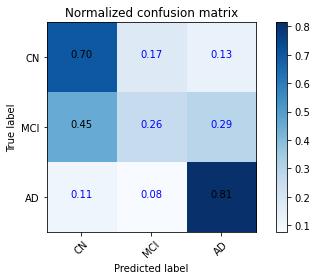

In [ ]:
classnames = num.array(['CN', 'MCI', 'AD'], dtype='<U10')
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    num.set_printoptions(precision=2)

   
    plot.figure()
    generate_confusion_matrix(cnf_matrix, classes=classnames, normalize=True, title='Normalized confusion matrix')
    plot.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plot.imshow(cnf_matrix, interpolation='nearest', cmap=plot.get_cmap('Blues'))
    plot.title(title)
    plot.colorbar()

    tick_marks = num.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.


    for i in range (cnf_matrix.shape[0]):
        for j in range (cnf_matrix.shape[1]):
          plot.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                    color="black" if cnf_matrix[i, j] > thresh else "blue")
          plot.tight_layout()
          plot.ylabel('True label')
          plot.xlabel('Predicted label')

    return cnf_matrix
plot_confusion_matrix(predicted_targets, actual_targets)